In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:95%!important; }</style>"))

C:\Users\CSYJ\AppData\Local\Temp\ipykernel_27916\999676280.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Missing colon in file WindowsPath('C:/Users/CSYJ/anaconda3/envs/smoking/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 243 ('nicode')
Missing colon in file 'C:\\Users\\CSYJ\\anaconda3\\envs\\smoking\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc', line 243 ('nicode')


In [3]:
pd.set_option('display.max_columns', None)

## Data 전처리

In [33]:
#데이터 불러오기
X_train = pd.read_csv('archive/competition_format/x_train.csv', index_col=0)
X_test = pd.read_csv('archive/competition_format/x_test.csv', index_col=0)
y_train = pd.read_csv('archive/competition_format/y_train.csv', index_col=0)
y_test = pd.read_csv('archive/competition_format/y_test.csv', index_col=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(44553, 25) (11139, 25) (44553, 1) (11139, 1)


In [34]:
# 'oral' column drop
X_train.drop('oral', axis=1, inplace=True)
X_test.drop('oral', axis=1, inplace=True)

In [35]:
# 백분위 값 확인
X_train.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
count,44553.000000,44553.000000,44553.000000,44553.000000,44553.000000,44553.000000,44553.00000,44553.000000,44553.000000,44553.000000,44553.000000,44553.000000,44553.000000,44553.000000,44553.000000,44553.000000,44553.000000,44553.000000,44553.000000,44553.000000,44553.000000,44553.000000
mean,44.210603,164.657038,65.883442,82.077247,1.011734,1.008134,1.02561,1.026036,121.529055,76.043454,99.320023,196.995646,126.721770,57.288421,115.037663,14.622194,1.087020,0.886097,26.213678,27.084731,40.065517,0.213521
std,12.089077,9.198571,12.823676,9.278288,0.488131,0.488762,0.15797,0.159245,13.688748,9.695288,20.845350,36.422908,71.611991,14.795235,40.937878,1.564872,0.404944,0.226092,19.087106,31.754805,50.723521,0.409797
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.00000,1.000000,71.000000,40.000000,46.000000,55.000000,8.000000,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.00000,1.000000,112.000000,70.000000,89.000000,172.000000,74.000000,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.00000,1.000000,120.000000,76.000000,96.000000,195.000000,108.000000,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,26.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.00000,1.000000,130.000000,82.000000,104.000000,220.000000,160.000000,66.000000,136.000000,15.700000,1.000000,1.000000,29.000000,31.000000,44.000000,0.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.00000,2.000000,240.000000,146.000000,505.000000,445.000000,999.000000,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000


In [36]:
# 이상치 변환 함수 , 특정컬럼

def outHigh(df, a):
    to_75 = df[a].quantile(0.75)
    target = df[a].quantile(0.90)
    df[a] = df[a].apply(lambda x: to_75 if x >= target else x)

In [37]:
# ['Gtp','triglyceride' ] 컬럼만 이상치변환
cols = ['Gtp','triglyceride' ]
for col in cols:
    outHigh(X_train, str(col))
    outHigh(X_test, str(col))

In [38]:
# ['Gtp', 'triglyceride'] 백분위 값 확인
X_train[['Gtp', 'triglyceride']].describe()

,Gtp,triglyceride
count,44553.000000,44553.000000
mean,29.764258,113.868247
std,15.538760,47.352661
min,1.000000,8.000000
25%,17.000000,74.000000
50%,26.000000,108.000000
75%,44.000000,160.000000
max,77.000000,226.000000


In [39]:
# 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=0)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(33414, 24) (11139, 24) (33414, 1) (11139, 1)


In [40]:
X_train[['Gtp', 'triglyceride']].describe()

,Gtp,triglyceride
count,33414.000000,33414.000000
mean,29.725325,113.689531
std,15.542169,47.388993
min,2.000000,15.000000
25%,17.000000,74.000000
50%,25.000000,108.000000
75%,44.000000,160.000000
max,77.000000,226.000000


In [11]:
# label encoder
from sklearn.preprocessing import LabelEncoder

def label(df, a):
    laencoder = LabelEncoder()
    afterEn = laencoder.fit_transform(df[[a]])
    return afterEn

In [12]:
# object column label encoder
X_train['gender'] = label(X_train,'gender')
X_test['gender'] = label(X_test,'gender')
X_val['gender'] = label(X_val,'gender')
X_train['tartar'] = label(X_train,'tartar')
X_test['tartar'] = label(X_test,'tartar')
X_val['tartar'] = label(X_val,'tartar')
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33414 entries, 31346 to 28362
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               33414 non-null  int32  
 1   age                  33414 non-null  int64  
 2   height(cm)           33414 non-null  int64  
 3   weight(kg)           33414 non-null  int64  
 4   waist(cm)            33414 non-null  float64
 5   eyesight(left)       33414 non-null  float64
 6   eyesight(right)      33414 non-null  float64
 7   hearing(left)        33414 non-null  float64
 8   hearing(right)       33414 non-null  float64
 9   systolic             33414 non-null  float64
 10  relaxation           33414 non-null  float64
 11  fasting blood sugar  33414 non-null  float64
 12  Cholesterol          33414 non-null  float64
 13  triglyceride         33414 non-null  float64
 14  HDL                  33414 non-null  float64
 15  LDL                  33414 non-n

C:\Users\CSYJ\anaconda3\envs\smoking\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\CSYJ\anaconda3\envs\smoking\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\CSYJ\anaconda3\envs\smoking\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\CSYJ\anaconda3\envs\smoking\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d arr

### 평가지표 함수 추가

In [13]:
# 평가

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, RocCurveDisplay, roc_curve
from sklearn.metrics import precision_recall_curve, average_precision_score, PrecisionRecallDisplay


def print_confusion_matrix(y, pred, title=None):
    """
    혼동행렬
    결과의 0번축: 실제 class, 1번 축: 예측 class
    """    
    print('='*50)
    if title:
        print(title)
        print('='*50)
    print(confusion_matrix(y, pred))
    print('='*50)
    
def print_classification_metrics(y, pred, title=None):
    """
    출력할 평가지표: accuracy, recall, precision, f1 score
    """
    print('='*50)
    if title:
        print(title)
        print('='*50)
    print('정확도(Accuracy):', accuracy_score(y, pred))
    print('재현율(Recall):', recall_score(y, pred))
    print('정밀도(Precision):', precision_score(y,pred))
    print('F1 점수(F1 Score)', f1_score(y, pred))
    print('='*50)

    
    
def display_roc_curve(y, pred_proba, title=None):
    """
    ROC curve, sorce
    [parameter]
    """
    print('='*50)
    print('roc-auc score')
    print('='*50)
    roc_auc = roc_auc_score(y,pred_proba)
    print(roc_auc)
    print('='*50)
    fpr, tpr, _ = roc_curve(y, pred_proba)
    disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    disp.plot()
    
    if title:
        plt.title(title)
    plt.show()


def display_precision_recall_curve(y, pred_proba, title=None):
    """
    P-R curve, score => 안 해도 될 것 같음.
    """
    print('='*50)
    print('ap score')
    print('='*50)
    ap_score = average_precision_score(y, pred_proba)
    print(ap_score)
    print('='*50)
    
    precision, recall, _ = precision_recall_curve(y, pred_proba)
    disp = PrecisionRecallDisplay(precision, recall, average_precision=ap_score)
    disp.plot()
    if title:
        plt.title(title)
    plt.show()



## RandomForestClassifier

In [20]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, roc_auc_score

### GTP, Triglyceride 이상치 변환 후 RandomForestClassfier

In [21]:
rf = RandomForestClassifier(n_estimators=300, max_depth=22, random_state=0) #모델

rf.fit(X_train, y_train)

C:\Users\CSYJ\AppData\Local\Temp\ipykernel_27916\4094858274.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=22, n_estimators=300, random_state=0)

In [22]:
rf_pred_train = rf.predict(X_train)
rf_pred_test = rf.predict(X_test)
rf_pred_val = rf.predict(X_val)

In [23]:
proba_train_rf = rf.predict_proba(X_train)[:,1]
proba_val_rf = rf.predict_proba(X_val)[:,1]
proba_test_rf = rf.predict_proba(X_test)[:,1]


In [ ]:
#max_depth =15
print_classification_metrics(y_train, rf_pred_train, title='RF_Train set에 대한 검증결과')
print_classification_metrics(y_test, rf_pred_test, title='RF_Test set에 대한 검증결과')
print_classification_metrics(y_val, rf_pred_val, title='RF_Validation set에 대한 검증결과')

In [ ]:
display_roc_curve(y_val, proba_val_rf, title='val_roc curve, score')
display_roc_curve(y_test, proba_test_rf, title='test_roc curve, score')

In [24]:
#max_depth =22
print_classification_metrics(y_train, rf_pred_train, title='RF_Train set에 대한 검증결과')
print_classification_metrics(y_test, rf_pred_test, title='RF_S_Test set에 대한 검증결과')
print_classification_metrics(y_val, rf_pred_val, title='RF_Validation set에 대한 검증결과')

RF_Train set에 대한 검증결과
정확도(Accuracy): 0.999191955467768
재현율(Recall): 0.9988584474885844
정밀도(Precision): 0.9989399005137405
F1 점수(F1 Score) 0.9988991723406858
RF_S_Test set에 대한 검증결과
정확도(Accuracy): 0.9384145794056917
재현율(Recall): 0.9290762856446503
정밀도(Precision): 0.906108866175422
F1 점수(F1 Score) 0.9174488567990374
RF_Validation set에 대한 검증결과
정확도(Accuracy): 0.7571595295807523
재현율(Recall): 0.7186888454011742
정밀도(Precision): 0.6539060761184065
F1 점수(F1 Score) 0.6847686749796061


roc-auc score
0.8403528104297985


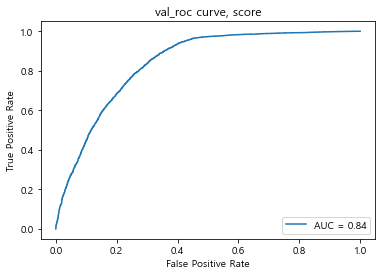

roc-auc score
0.9840517282588468


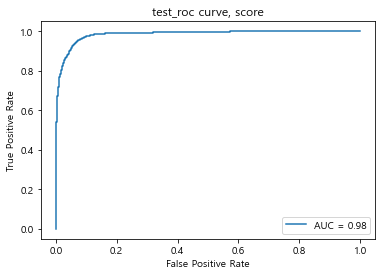

In [25]:
display_roc_curve(y_val, proba_val_rf, title='val_roc curve, score')
display_roc_curve(y_test, proba_test_rf, title='test_roc curve, score')

## XGB

### Gtp, Triglyceride 컬럼 이상치 제거 후 XGB 

In [26]:
from xgboost import XGBClassifier

In [27]:
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=15, random_state=0)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [28]:
xgb_pred_train = xgb.predict(X_train)
xgb_pred_test = xgb.predict(X_test)
xgb_pred_val = xgb.predict(X_val)

In [ ]:
#max_depth = 3
print_classification_metrics(y_train, xgb_pred_train, "XGB Train set에 대한 검증결과")
print_classification_metrics(y_test, xgb_pred_test, 'XGB Test set에 대한 검증결과')
print_classification_metrics(y_val, xgb_pred_val, 'XGB Val set에 대한 검증결과')

In [ ]:
display_roc_curve(y_val, proba_val_rf, title='val_roc curve, score')
display_roc_curve(y_test, proba_test_rf, title='test_roc curve, score')

In [ ]:
#max_depth = 10
print_classification_metrics(y_train, xgb_pred_train, "XGB Train set에 대한 검증결과")
print_classification_metrics(y_test, xgb_pred_test, 'XGB Test set에 대한 검증결과')
print_classification_metrics(y_val, xgb_pred_val, 'XGB Val set에 대한 검증결과')

In [ ]:
display_roc_curve(y_val, proba_val_rf, title='val_roc curve, score')
display_roc_curve(y_test, proba_test_rf, title='test_roc curve, score')

In [29]:
#max_depth = 15
print_classification_metrics(y_train, xgb_pred_train, "XGB Train set에 대한 검증결과")
print_classification_metrics(y_test, xgb_pred_test, 'XGB Test set에 대한 검증결과')
print_classification_metrics(y_val, xgb_pred_val, 'XGB Val set에 대한 검증결과')

XGB Train set에 대한 검증결과
정확도(Accuracy): 0.999790506973125
재현율(Recall): 0.9996738421395955
정밀도(Precision): 0.9997553616570171
F1 점수(F1 Score) 0.9997146002364741
XGB Test set에 대한 검증결과
정확도(Accuracy): 0.9290780141843972
재현율(Recall): 0.9066536680477699
정밀도(Precision): 0.901381148534044
F1 점수(F1 Score) 0.9040097205346294
XGB Val set에 대한 검증결과
정확도(Accuracy): 0.7521321483077476
재현율(Recall): 0.6939823874755382
정밀도(Precision): 0.6526340004600875
F1 점수(F1 Score) 0.6726733847065798


In [ ]:
display_roc_curve(y_val, proba_val_rf, title='val_roc curve, score')
display_roc_curve(y_test, proba_test_rf, title='test_roc curve, score')